<a href="https://colab.research.google.com/github/HarshiniAiyyer/Relearning/blob/main/pytorch/4_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Computer Vision

# A. ANNs for MNIST

## I. Setup

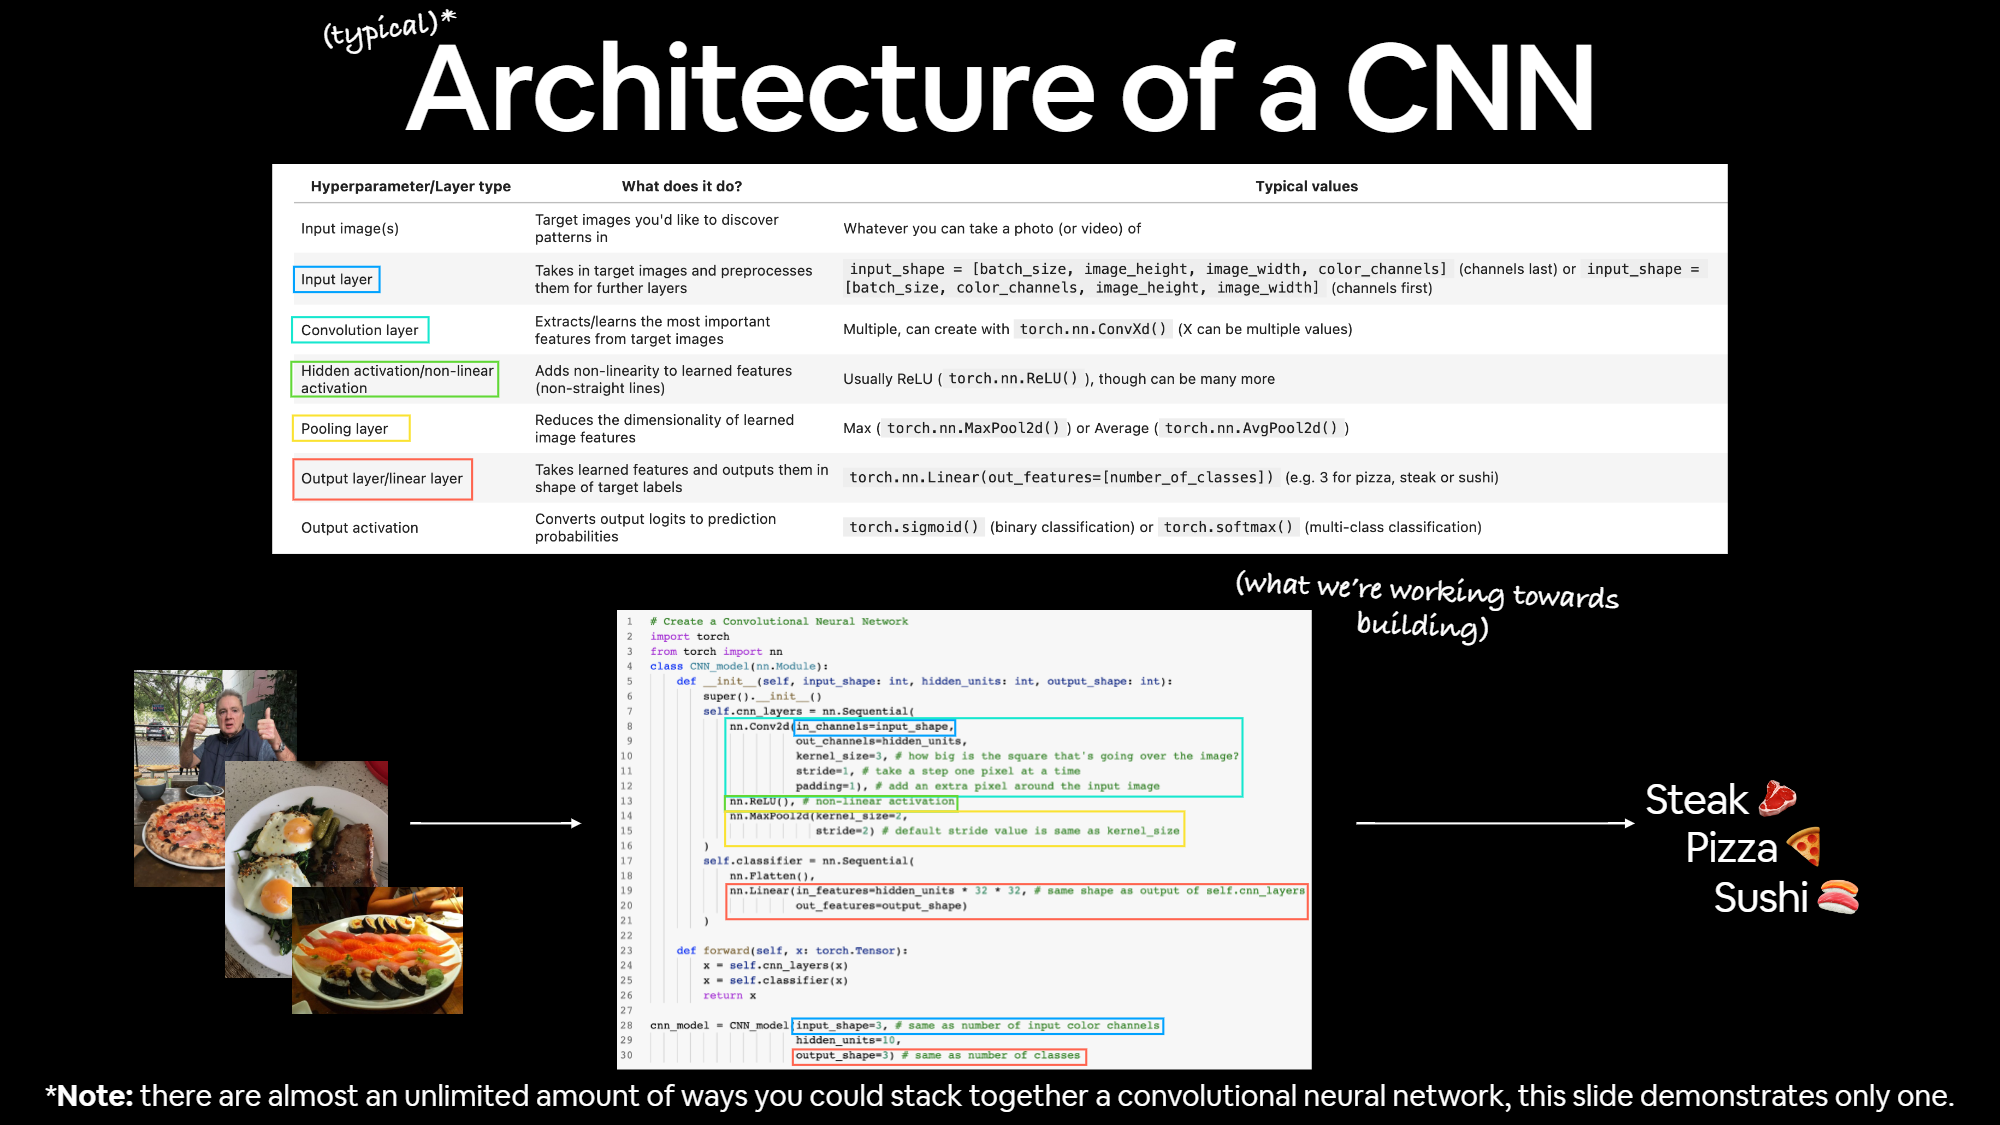

### Computer Vision Libraries


- **```torchvision```** :	Contains datasets, model architectures and image transformations often used for computer vision problems.

- **```torchvision.datasets```**	Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.

- **```torchvision.models```**	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.

- **```torchvision.transforms```**	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.

The below ones are common to all pytorch use cases but still included here.

- **``torch.utils.data.Dataset``**:	Base dataset class for PyTorch.

- **``torch.utils.data.DataLoader``**:	Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

### Import libraries

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.8.0+cu126
torchvision version: 0.23.0+cu126


### Getting the dataset

- MNIST one

In [2]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",
    train=True, #do we want the training data?
    download=True,
    transform=torchvision.transforms.ToTensor(), #convert the data to what?
    target_transform=None #how do we transform the labels
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, #do we want the training data?
    download=True,
    transform=ToTensor(), #convert the data to what?
    target_transform=None #how do we transform the labels
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

### See the first training exmaple

In [4]:
img, label = train_data[9]
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6431, 0.1961,
           0.0000, 0.0275, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0039, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0039, 0.0039,
           0.0000, 0.0000, 0.0196, 0.0000, 

In [5]:
class_names_with_nos = train_data.class_to_idx
class_names_with_nos

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
print(f"Image shape {img.shape} -> [color_channels, height, width]")
print(f"Image label: {train_data.classes[label]}")

Image shape torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Sandal


- Color channel here is 1, because the dataset is black and white.

- Grayscale images have only 1 color channel.

### Visualizing

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")

Image shape: torch.Size([1, 28, 28])


- plt.imshow rn will create an error because it is in 3D : not the format matplotlib expects.

- We use squeeze() to remove that one extra dimension

Image shape: torch.Size([1, 28, 28])


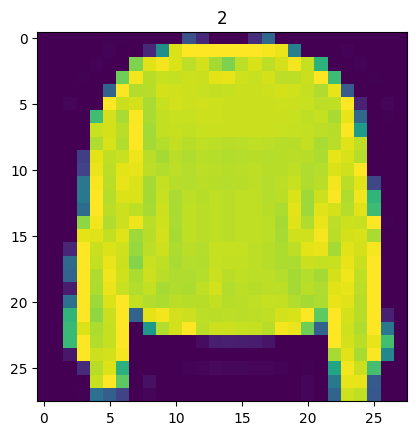

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[7] #random pick by me
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

lets print this in grayscale itself

Text(0.5, 1.0, 'Pullover')

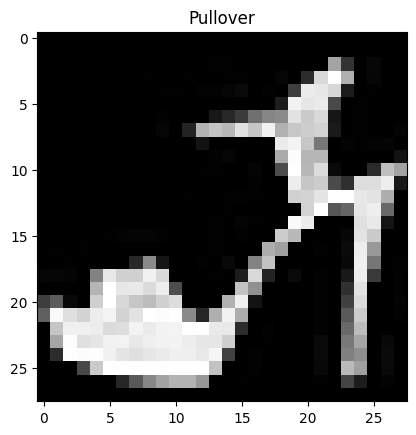

In [9]:
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(train_data.classes[label])

##### plotting more images

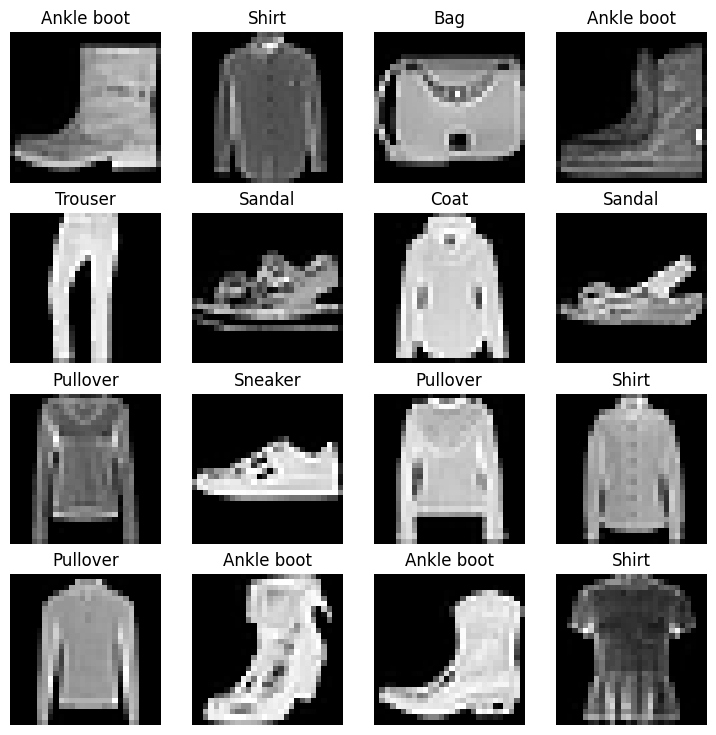

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False);

## II. Prepare Dataloader

- Turns dataset into a python iterable

- turns data into mini batches

⚾**WHY?**

- Because it's more computationally efficient. The system cant store 60k images in 1 hit. So we break it down to 32 images at a time / batchsize = 32

- NN gets more chances to update gradients per epoch




#### Setup

In [11]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameter
BATCH_SIZE = 32

#datasets to batches

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

- ```shuffle``` is used for the ```train loader``` because we dont want the model to remember it using the order necessarily.

- ```test loader``` however need not be ```shuffled``` as the model doesnt necessarily encounter this during training.


In [12]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a47c2284260>, <torch.utils.data.dataloader.DataLoader object at 0x7a47c1e5c500>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

#### Check a single sample

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


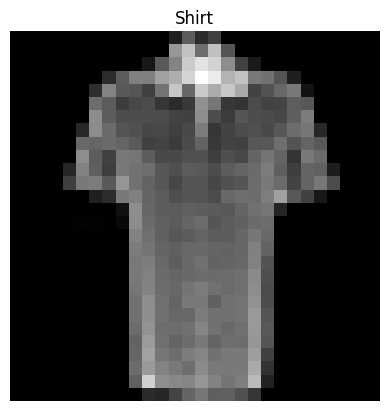

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## III. Model 0: Create a baseline with 2 linear layers

- A baseline model is a  model u will try to improve upon with subsequent experiments.

- Start simply and add complexity when necessary.

#### Create a flattened layer



In [15]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
#x.shape
output = flatten_model(x) #perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


#### Defining the class

In [16]:
from torch import nn

class MNIST0(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
     super().__init__()
     self.layer_stack = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features = input_shape,
                   out_features = hidden_units),
         nn.Linear(in_features = hidden_units,
                   out_features = output_shape)
     )

  def forward(self, x):
    return self.layer_stack(x)

In [17]:
torch.manual_seed(42)
model0 = MNIST0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(train_data.classes)
).to("cpu")

model0

MNIST0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

#### Dummy and checking the params

In [18]:
dummyx = torch.rand([1,1,28,28])
model0(dummyx)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [19]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

#### Setting up loss and optimizer and evaluation metrics

- Loss function is ```nn.CrossEntropyLoss()```

- Optimizer is ```torch.optim.SGD()```

- Evaluation: Accuracy

#### Setup

In [20]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('exists, skipping download')
else:
  print('downloading file')
  req = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', "wb") as f:
    f.write(req.content)



exists, skipping download


In [21]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params = model0.parameters(), lr = 0.1)

#### Creating a function to time our experiments

in ml, we track two things ->

- we track model performance and
- the time it takes to execute

In [22]:
from timeit import default_timer as timer

def printtime(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Training time on {device} is {total_time: .3f} seconds")
  return total_time

In [23]:
start_time = timer()
#soem code
end_time = timer()

printtime(start = start_time, end = end_time, device = "cpu" )


Training time on cpu is  0.000 seconds


7.23509992894833e-05

#### Creating a training loop and training the model on batches of data

1. Loop thru epochs
2. Loop thru training batches, perform training steps, calculate train loss *per batch*.
3. Loop thru testing batches, perform testing steps, calculate test loss *per batch*.
4. Print whats happening
5. Time it all.

#### Tqdm

In [24]:
from tqdm.auto import tqdm
#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epochs
epochs = 3

#### Create training and testing loop

In [25]:
for epoch in tqdm(range(epochs)):
  print(f"epoch {epoch}")

  #######!!!!----TRAINING-----!!!!!#####
  train_loss = 0

  #add a loop to loop thru the training batches

  for batch, (x, y) in enumerate(train_dataloader):
    model0.train()

    #1. forward pass
    y_pred = model0(x)

    #2. LOSS PER BATCH
    loss = loss_fn(y_pred, y)
    train_loss += loss #train loss per batch instead

    #3. OPTIMIZER
    opt.zero_grad()

    #4. LOSS BACKWARD
    loss.backward()

    #5. OPTIMIZER STEP
    opt.step()

    #print out whats happening
    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples")

  #divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)


#######!!!!----TESTING-----!!!!!#####

test_loss, test_acc = 0, 0
model0.eval()

with torch.inference_mode():
  for x_test, y_test in test_dataloader:

    #1. FORWARD PASS
    test_pred = model0(x_test)

    #2. CALCULATE LOSS (ACCUMULAATING)
    test_loss += loss_fn(test_pred, y_test)

    #3. CALCULATE ACCURACY
    test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

  #calculate the test loss average per batch
  test_loss /= len(test_dataloader)

  #test acc per batch
  test_acc /= len(test_dataloader)


  #printout whats happening
  print(f"\nTrain loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, test acc: {test_acc}")

#calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = printtime(start = train_time_start_on_cpu, end = train_time_end_on_cpu,
                                     device=str(next(model0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
epoch 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4532 | Test Loss: 0.5109, test acc: 82.37819488817891
Training time on cpu is  34.214 seconds


##### Make predictions and get Model 0 results

In [87]:
model2_results = eval_model(model = model2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model2_results

{'model_name': 'MNIST2VGG',
 'model_loss': 0.34232625365257263,
 'model_acc': 87.46006389776358}

#### Setup device agnostic code (if there is a GPU)

In [ ]:
torch.cuda.is_available()

## IV. Model 1: Building a better model with non - linearity

#### Setup

In [80]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [81]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(train_data.classes) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cpu')

#### Setup loss optimizer and evaluation metrics

In [82]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

#### Functionizing training and evaluation/testing loops

In [32]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (x, y) in enumerate(data_loader):
        # Send data to GPU
        x, y = x.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(x)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for x, y in data_loader:
            # Send data to GPU
            x, y = x.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(x)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a PyTorch model on a given dataset.

    Args:
        model: A PyTorch model to evaluate.
        data_loader: A DataLoader instance for the dataset to evaluate on.
        loss_fn: A PyTorch loss function.
        accuracy_fn: A function to calculate accuracy.
        device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
        A dictionary containing the loss, accuracy, and model name.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale metrics to get average loss and accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works if model is a class
            "model_loss": loss.item(),
            "model_acc": acc}

#### Running the code

In [83]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = printtime(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Training time on cpu is  35.535 seconds


In [ ]:
print(model0_results, total_train_time_model_0)

**Note**: Sometimes a model can be faster on a CPU than the GPU.

Why?

- the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.

- the hardware u use has a better CPU in terms compute capability than the GPU.

#### Get model 1 results

In [78]:
model1_results = eval_model(
    model=model_1, data_loader = test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn
)

model1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

# B. CNNs for MNIST

- We will replicate the TinyVGG (very deep convolutional neural network) model, which is a type of CNN.

⏰ we wud use two sets of convolutional blocks in this.

- The first block will perform feature extraction as it tries to learn the features of the dataset

- the 2nd block will try to classify the feature extracted learnings

### Defining the function

In [33]:
class MNIST2VGG(nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
     super().__init__()

     self.conv_block_1 = nn.Sequential(
         nn.Conv2d(in_channels=input_shape,
                   out_channels=hidden_units, kernel_size = 3,
                   stride=1,
                   padding=1),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units, kernel_size = 3,
                   stride=1,
                   padding=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2)
     )
     self.conv_block_2 = nn.Sequential(
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
         nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2)
     )

     self.classifier = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=hidden_units*7*7, # Corrected in_features to 490 (10 hidden_units * 7 height * 7 width)
                   out_features = output_shape)

      )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # Removed temporary print statement from here as we determined the shape
    x = self.classifier(x)
    return x

why hidden_units*0?

- we will get back to that later.

### Class invoking

- ```input_shape``` starts with 3, if u have color images (rgb) if u dont, put it as 1.

In [ ]:
torch.manual_seed(42)
model2 = MNIST2VGG(input_shape=1,
                   hidden_units=10,
                   output_shape = len(train_data.classes)).to(device)

### ***OPTIONAL SECTION: APPENDIX KINDA STUFF***

#### ``nn.Conv2d``

- We will look at dummy data in here.
- This has no relation to the one above

##### Setup

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch

images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]

test_image = images[0] # get a single image for testing


print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")

print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")

print(f"Single image pixel values:\n{test_image}")

##### Creating a simple conv2d layer

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                   out_channels=10,
                   kernel_size=(3,3),
                   stride=1,
                   padding=0)

- ```in_channels (int)``` - Number of channels in the input image.

- ```out_channels (int)``` - Number of channels produced by the convolution.

- ```kernel_size (int or tuple)``` - Size of the convolving kernel/filter.

- ```stride (int or tuple, optional)``` - How big of a step the convolving kernel takes at a time. Default: 1.

- ```padding (int, tuple, str)``` - Padding added to all four sides of input. Default: 0.

##### Pass the data thru the convolutional layer

In [ ]:
test_image.shape

In [ ]:
conv_output = conv_layer(test_image)
conv_output.shape

#### ``nn.MaxPool2d``

- Maxpool extracts the sharpest features of the image only. which are obviously highest. or the most imp features.

- Also they perform dimensionality reduction for the same by doing this.

- Input includes (N,C,H,W) where they stand for (No of batches, color channels, height and width)


##### without and with unsqueeze dimension

In [ ]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")


##### Create a sample nn.MaxPool2d() layer

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

##### Pass data through just the conv_layer

In [ ]:
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

##### Pass data through the max pool layer

In [ ]:
# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

### Setup a loss and optimizer for ```model_2```

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params = model2.parameters(), lr = 0.1)


### Training and testing ```model_2```

In [86]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Re-instantiate model and optimizer for model2 to ensure proper state
model2 = MNIST2VGG(input_shape=1,
                   hidden_units=10,
                   output_shape = len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(params = model2.parameters(), lr = 0.001) # Changed optimizer to Adam

#measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}")

  train_step(model = model2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer = opt, accuracy_fn=accuracy_fn, device = device)

  test_step(model = model2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device = device)


train_time_end_model_2 = timer()
total_train_time_model_2 = printtime(start = train_time_start_model_2, end = train_time_end_model_2,
                                     device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
Train loss: 0.54069 | Train accuracy: 80.41%
Test loss: 0.40143 | Test accuracy: 85.33%

epoch: 1
Train loss: 0.35712 | Train accuracy: 87.08%
Test loss: 0.35300 | Test accuracy: 87.50%

epoch: 2
Train loss: 0.32314 | Train accuracy: 88.22%
Test loss: 0.34233 | Test accuracy: 87.46%

Training time on cpu is  197.285 seconds


#### Comparing results

In [37]:
model2_results = eval_model(model = model2, data_loader= test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device)

model2_results

{'model_name': 'MNIST2VGG',
 'model_loss': 0.33307161927223206,
 'model_acc': 87.74960063897764}

#### Compare model results and training time

In [88]:
import pandas as pd
comps = pd.DataFrame([model0_results, model1_results, model2_results])
comps

,model_name,model_loss,model_acc
0,MNIST0,0.510876,82.378195
1,FashionMNISTModelV1,0.685001,75.019968
2,MNIST2VGG,0.342326,87.460064


In [89]:
comps['traintime'] = [total_train_time_model_0, total_train_time_model_1,total_train_time_model_2]

comps

,model_name,model_loss,model_acc,traintime
0,MNIST0,0.510876,82.378195,34.213565
1,FashionMNISTModelV1,0.685001,75.019968,35.534904
2,MNIST2VGG,0.342326,87.460064,197.284816


#### Visualize the model results

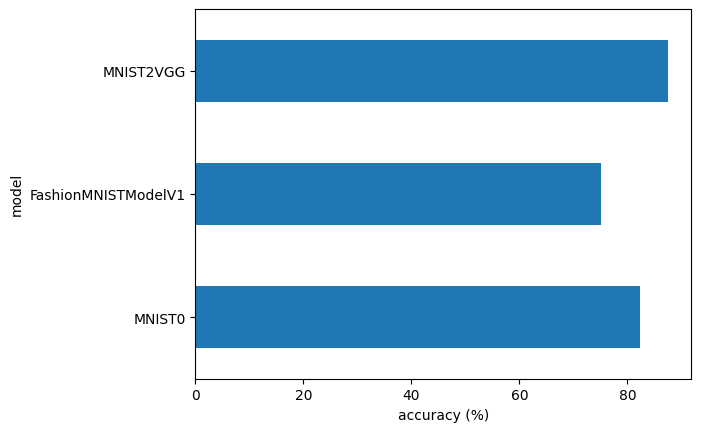

In [90]:
# Visualize our model results
comps.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### Make and evaluate random predictions with the best model

In [55]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [57]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({train_data.classes[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


#### Make predictions on test samples with model 2

In [59]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.1768e-08, 8.6203e-11, 1.8827e-10, 5.5265e-10, 5.2426e-09, 9.9995e-01,
         1.7953e-07, 1.2662e-07, 8.4186e-07, 5.2721e-05],
        [5.1035e-01, 3.0239e-01, 1.1327e-03, 4.9038e-02, 4.7023e-02, 2.9895e-05,
         8.9492e-02, 1.1676e-04, 3.9674e-04, 3.1374e-05]])

#### Convert pred probs to labels with argmax

In [60]:
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 0, 7, 4, 3, 0, 4, 7, 1])

#### Plot predictions

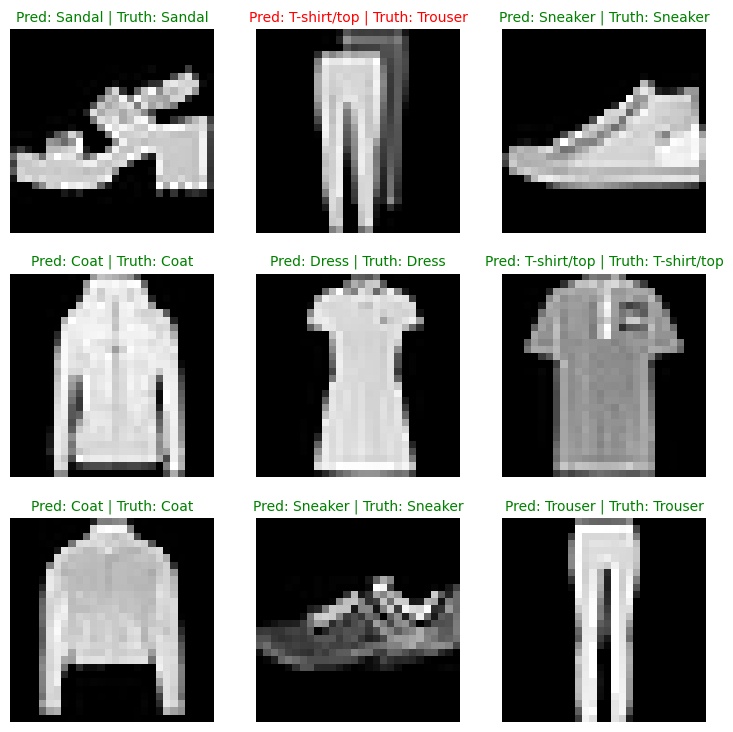

In [62]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = train_data.classes[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = train_data.classes[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

### Making a confusion matrix

#### Setup

In [67]:
!pip install -q torchmetrics

In [68]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [69]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


#### Check predictions

In [64]:
#1. make predictions with trained model (model 2)

y_preds = []
model2.eval()

with torch.inference_mode():
  for x,y in tqdm(test_dataloader, desc = "making predictions.."):

    #SEND THE DATA TO THE DEVICES
    x, y = x.to(device), y.to(device)

    #DO THE FORWARD PASS
    y_logit = model2(x)

    #TURN THE PREDICTIONS FROM LOGITS -> PRED PROBS -> PRED LABELS
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)

    #PUT THE PREDICTIONS ON CPU FOR EVALUATION
    y_preds.append(y_pred.cpu())


#CONCATENATE THE LIST OF PREDICTIONS INTO A TENSOR
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

making predictions..:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

#### Make the matrix

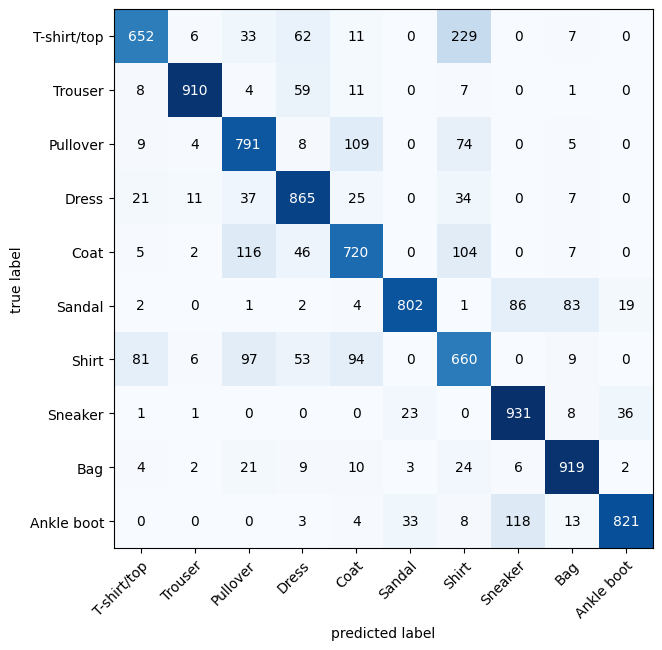

In [92]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. setup con mat and compare predictions to targets

confmat = ConfusionMatrix(task='multiclass', num_classes = len(train_data.classes))
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), # matplotlib likes NumPy
                                class_names=train_data.classes,
                                figsize=(10, 7));

### Save and load the model

#### Setup

In [94]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


#### Create a new instance

In [95]:
#create a new instance

#loading model will error if the shapes here aren't the same as the saved version

loaded_model_2 = MNIST2VGG(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

#### Evaluate loaded model

In [96]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'MNIST2VGG',
 'model_loss': 0.34232625365257263,
 'model_acc': 87.46006389776358}

#### Check if new model and old model results are close to each other

- if they arent, there might be an error

In [98]:
torch.isclose(torch.tensor(model2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

This is the end of the notebook.